In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("./Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [89]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [90]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [91]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Axes: >

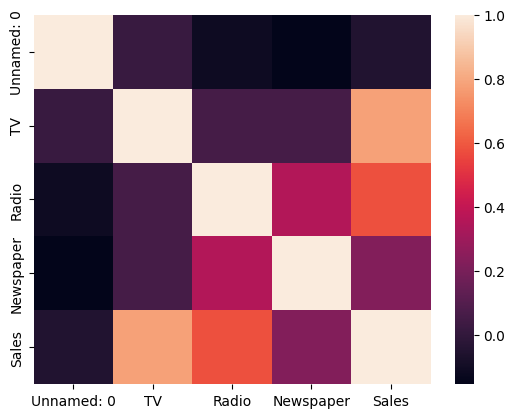

In [92]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix)

In [93]:
target_col = "Sales"
corr_thresh_upper = 0.2
corr_thresh_lower = -0.25

columns = corr_matrix[target_col][(corr_matrix[target_col] > corr_thresh_upper) | (corr_matrix[target_col] < corr_thresh_lower)].index.tolist()

In [94]:
columns.pop(-1)

'Sales'

In [95]:
columns

['TV', 'Radio', 'Newspaper']

In [96]:
y = df[target_col]
x = df[columns]

In [97]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred = lr.predict(x_test)

In [102]:
lr.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [103]:
list(zip(x,lr.coef_))

[('TV', 0.044729517468716326),
 ('Radio', 0.18919505423437669),
 ('Newspaper', 0.0027611143413671657)]

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
Mean_absolute_error = mean_absolute_error(y_test,y_pred)
Mean_squared_error = mean_squared_error(y_test,y_pred)
Root_mean_squared_error = np.sqrt(Mean_squared_error)
R_squared = lr.score(x,y)

In [105]:
print(f"Mean_absolute_error: {Mean_absolute_error}")
print(f"Mean_squared_error: {Mean_squared_error}")
print(f"Root_mean_squared_error: {Root_mean_squared_error}")
print(f"R_squared: {R_squared}")

Mean_absolute_error: 1.4607567168117603
Mean_squared_error: 3.174097353976104
Root_mean_squared_error: 1.7815996615334502
R_squared: 0.8966643473004003
